<div class="panel panel-danger">
  <div class="panel-heading">
    <h3 class="panel-title">The 10% hiring assistant problem</h3>
  </div>
  <div class="panel-body">
It is actually expensive (in dollars and morale) to fire and hire people, so management proposes the following solution. You will only fire and hire a new assistant if they are 10% better than the current assistant.

Answer the questions below. You will be asked to present your work after the breakout so make sure to indicate your answers clearly and concisely.
  </div>
</div>



<span class="minerva-question" style='background-color:#d9534f;padding: 5px 20px 5px 20px;line-height:30px;color:white;font-weight: bold; border-radius: 25px'>Question 1</span>

Modify your code to implement the 10% hiring assistant problem. Write it down below.

In [5]:
## your code here

def hire_assistant_10pct(applicants):
    """
    Return the number of assistant hired.
    Inputs:
    - applicants: a list of the numbers that represent the level of qualification of 
    the applicants; the higher the number, the better qualified
    
    Outputs:
    - hires: Number of assistants hired
    """
    best = float('-inf')
    hired = 0
    for applicant in applicants:
        if applicant > best * 1.1:
            best = applicant
            hired += 1
            
    return hired


In [7]:
hire_assistant_10pct([1,2,3,4,5,6,7])

7

<span class="minerva-question" style='background-color:#d9534f;padding: 5px 20px 5px 20px;line-height:30px;color:white;font-weight: bold; border-radius: 25px'>Question 2</span>

There is now a stopping threshold. Analytically find the quality of the assistant that makes it impossible to hire a 10% better assistant. When an assistant better than this threshold is hired then you can exit the simulation early.

In [20]:
## your code here

def hire_assistant_10pct(applicants, th = 0):
    """
    Return the number of assistant hired.
    Inputs:
    - applicants: a list of the numbers that represent the level of qualification of 
    the applicants; the higher the number, the better qualified
    
    Outputs:
    - hires: Number of assistants hired
    """
    best = float('-inf')
    hired = 0
    global steps
    for applicant in applicants:
        steps += 1 
        if applicant > 1/(1+th): # upper bound 
            best = applicant
            steps += 1 
            break
        if applicant > best * (1+th):
            best = applicant
            hired += 1
            steps += 1
            
    return hired

<span class="minerva-question" style='background-color:#d9534f;padding: 5px 20px 5px 20px;line-height:30px;color:white;font-weight: bold; border-radius: 25px'>Question 3</span>

Run your code to get estimates of how many steps on average it takes to exit the simulation. Write down your answer below.

In [14]:
import random
import numpy as np
from matplotlib import pyplot

In [15]:
len_lists = [i for i in range(0,1000,100)]
len_lists

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900]

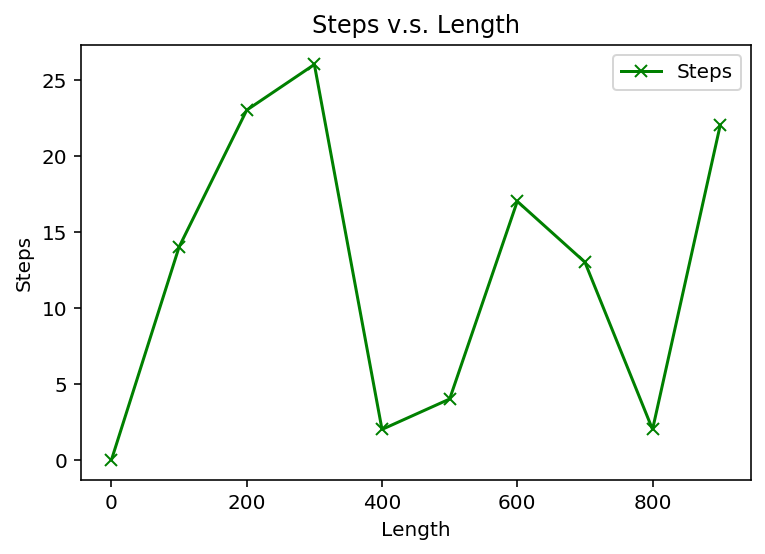

In [16]:
sim = 20
step_log = []
for lenth in len_lists:
    alist = np.random.uniform(0,1,lenth)
    steps = 0 
    hire_assistant_10pct(alist)
    step_log.append(steps)

# plot of the 3-way merge sort as the input list gets longer
pyplot.plot(
    len_lists,
    step_log,
    marker='x',
    color = 'green'
)


# including parts to make the plot more informative, such as legends and titles
pyplot.title("Steps v.s. Length")
pyplot.xlabel("Length")
pyplot.ylabel("Steps")
pyplot.legend(["Steps", "Extended Mergesort"])
pyplot.show()

<span class="minerva-question" style='background-color:#d9534f;padding: 5px 20px 5px 20px;line-height:30px;color:white;font-weight: bold; border-radius: 25px'>Question 4</span>

Run your code to get estimates of how likely is it to hire the second person you interview? Write down your answer below.

In [0]:
## your code and answer

In [18]:
import matplotlib.pyplot as plt

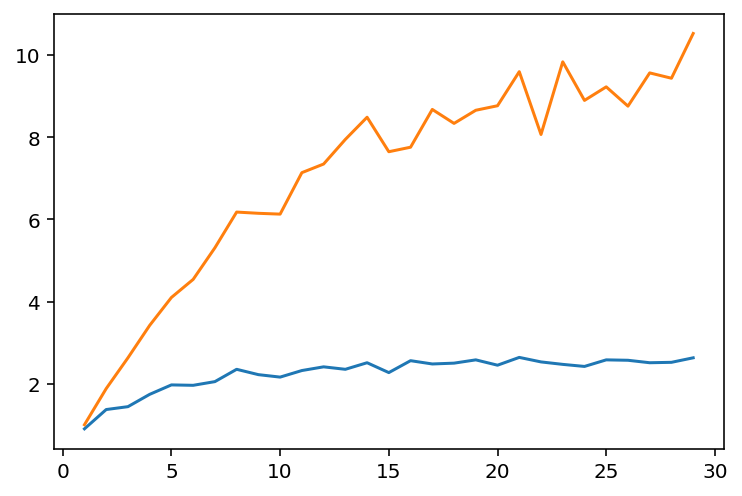

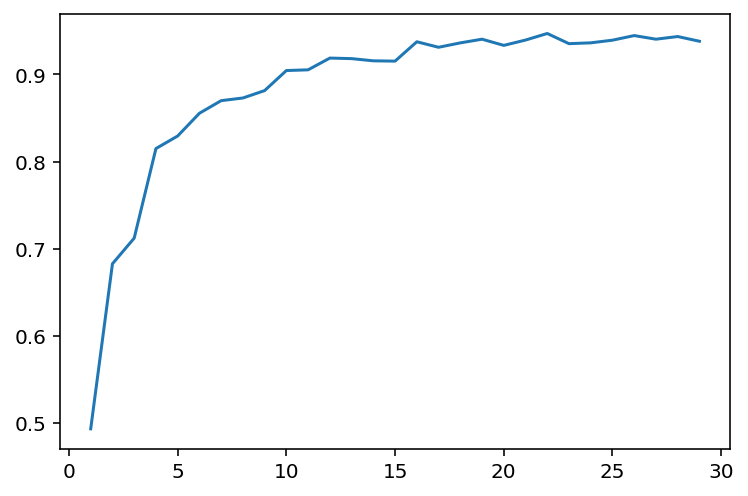

In [19]:
#Professor code: Hiring problem 10% threshold
def hire_assistant_10(n):
    best = 0
    hirecount = 0
    interview_count = 0
    hired = 0
    for i in range(1,n+1):
        val = random.uniform(0,1) #each number 0.1 away from each other
        interview_count = interview_count+1
        if (val > best + .1 or (val >= .9 and val > best)): 
            #this is because we generated uniformly distributed from 0 to 1
            best = val
            hirecount = hirecount+1
            hired = i
            if (val >= .9):
                break
    return (best,hired,hirecount,interview_count)
ns = range(1,30)
counts = []
icounts = []
bests = []
for i in ns:
    avg = 0
    avgi = 0
    bavg = 0
    for j in range(100):
        (best,_,count,icount) = hire_assistant_10(i)
        avg = avg + count
        avgi = avgi + icount
        bavg = bavg + best
    avg = avg / 100
    avgi = avgi / 100
    bavg = bavg / 100
    counts.append(avg)
    icounts.append(avgi)
    bests.append(bavg)
plt.plot(ns, counts)
plt.plot(ns, icounts) 
plt.show()
plt.plot(ns, bests)
plt.show()
